# import the libraries

In [73]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from utils import *

sns.set_style("darkgrid")

# read the data

In [139]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# EDA

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               553952 non-null  int64  
 1   Date               553952 non-null  object 
 2   Locality           553952 non-null  object 
 3   Address            553952 non-null  object 
 4   Estimated Value    553952 non-null  float64
 5   Sale Price         553952 non-null  float64
 6   Property           553952 non-null  object 
 7   Residential        553952 non-null  object 
 8   num_rooms          553952 non-null  int64  
 9   carpet_area        553952 non-null  int64  
 10  property_tax_rate  553952 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 46.5+ MB


In [76]:
train.head()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
0,2009,2009-01-02,Greenwich,40 ETTL LN UT 24,711270.0,975000.0,Condo,Condominium,2,760,1.025953
1,2009,2009-01-02,East Hampton,18 BAUER RD,119970.0,189900.0,Single Family,Detached House,3,921,1.025953
2,2009,2009-01-02,Ridgefield,48 HIGH VALLEY RD.,494530.0,825000.0,Single Family,Detached House,3,982,1.025953
3,2009,2009-01-02,Old Lyme,56 MERIDEN RD,197600.0,450000.0,Single Family,Detached House,3,976,1.025953
4,2009,2009-01-02,Naugatuck,13 CELENTANO DR,105440.0,200000.0,Single Family,Detached House,3,947,1.025953


In [77]:
train.tail()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
553947,2022,2022-12-31,Enfield,50 SWORD AVE,122420.0,198000.0,Residential,Detached House,3,1009,1.003979
553948,2022,2022-12-31,Naugatuck,10 ROLLINGWOOD DR,139180.0,319900.0,Residential,Detached House,3,999,1.003979
553949,2022,2022-12-31,South Windsor,189 PALMER DR,200000.0,305000.0,Residential,Detached House,3,1017,1.003979
553950,2022,2022-12-31,Bloomfield,33 BURNWOOD DRIVE,195440.0,271000.0,Residential,Detached House,3,1061,1.003979
553951,2022,2022-12-31,Stamford,154 GAYMOOR DRIVE,346600.0,500000.0,Residential,Detached House,3,1003,1.003979


# checking and handling null values

In [78]:
train.isna().sum()

Year                 0
Date                 0
Locality             0
Address              0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
dtype: int64



# Duplicate data handling

In [79]:
train.duplicated().sum()

18

In [80]:
# there are 18 duplicates in the data.
# duplicates are removed with the below code
train.drop_duplicates(inplace=True,ignore_index=True)

# Converting date column to datetime

In [81]:
train['Date']=pd.to_datetime(train['Date'],format="%Y-%m-%d")

In [82]:
train.describe()

,Year,Estimated Value,Sale Price,num_rooms,carpet_area,property_tax_rate
count,553934.000000,5.539340e+05,5.539340e+05,553934.000000,553934.000000,553934.000000
mean,2016.118543,2.492237e+05,3.514695e+05,2.944443,988.756455,1.142288
std,4.146523,1.288904e+06,6.708997e+05,0.734615,247.022579,0.168563
min,2009.000000,0.000000e+00,0.000000e+00,2.000000,600.000000,1.003979
25%,2012.000000,1.113700e+05,1.480000e+05,3.000000,915.000000,1.023495
50%,2017.000000,1.603000e+05,2.300000e+05,3.000000,984.000000,1.025846
75%,2020.000000,2.484000e+05,3.647000e+05,3.000000,1053.000000,1.348259
max,2022.000000,8.815100e+08,1.570000e+08,8.000000,3000.000000,1.422308


In [83]:
train.corr(numeric_only=True)

,Year,Estimated Value,Sale Price,num_rooms,carpet_area,property_tax_rate
Year,1.000000,-0.004039,-0.005003,0.005263,0.003912,0.016328
Estimated Value,-0.004039,1.000000,0.220932,0.000469,-0.000795,-0.004265
Sale Price,-0.005003,0.220932,1.000000,-0.004875,-0.009121,-0.008673
num_rooms,0.005263,0.000469,-0.004875,1.000000,0.966361,-0.003263
carpet_area,0.003912,-0.000795,-0.009121,0.966361,1.000000,-0.003813
property_tax_rate,0.016328,-0.004265,-0.008673,-0.003263,-0.003813,1.000000


# Correlation analysis

<AxesSubplot: >

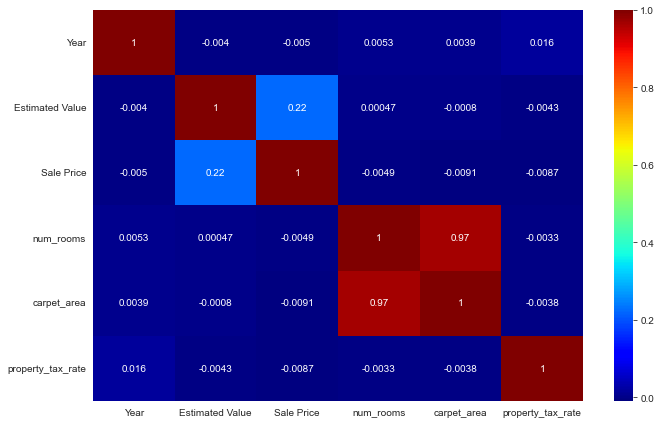

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True),annot=True,cmap='jet')

In [85]:
train.drop('carpet_area',axis=1,inplace=True)

# Cardinality check

In [86]:
for col in train.select_dtypes(include='object'):
    print("{}------------{}\n".format(col,train[col].nunique()))

Locality------------170

Address------------441774

Property------------6

Residential------------5



In [87]:
train.drop("Address",axis=1,inplace=True)

<AxesSubplot: >

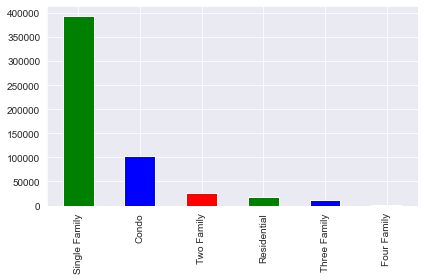

In [88]:
train.Property.value_counts().sort_values(ascending=False).plot(kind='bar',color=['green','blue','red'])

<AxesSubplot: >

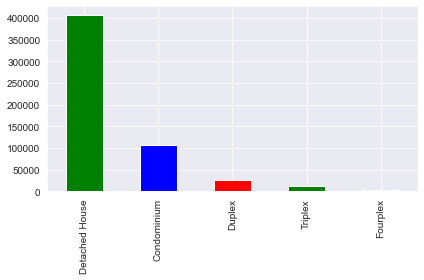

In [89]:
train.Residential.value_counts().sort_values(ascending=False).plot(kind='bar',color=['green','blue','red'])

In [90]:
train

,Year,Date,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,property_tax_rate
0,2009,2009-01-02,Greenwich,711270.0,975000.0,Condo,Condominium,2,1.025953
1,2009,2009-01-02,East Hampton,119970.0,189900.0,Single Family,Detached House,3,1.025953
2,2009,2009-01-02,Ridgefield,494530.0,825000.0,Single Family,Detached House,3,1.025953
3,2009,2009-01-02,Old Lyme,197600.0,450000.0,Single Family,Detached House,3,1.025953
4,2009,2009-01-02,Naugatuck,105440.0,200000.0,Single Family,Detached House,3,1.025953
...,...,...,...,...,...,...,...,...,...
553929,2022,2022-12-31,Enfield,122420.0,198000.0,Residential,Detached House,3,1.003979
553930,2022,2022-12-31,Naugatuck,139180.0,319900.0,Residential,Detached House,3,1.003979
553931,2022,2022-12-31,South Windsor,200000.0,305000.0,Residential,Detached House,3,1.003979
553932,2022,2022-12-31,Bloomfield,195440.0,271000.0,Residential,Detached House,3,1.003979


# categorical feature engineering

In [91]:
from category_encoders import HashingEncoder

In [92]:
he=HashingEncoder(cols=['Locality'])

In [93]:
he.fit(train)

HashingEncoder(cols=['Locality'], max_process=4, max_sample=138483)

In [94]:
train=he.transform(train)

In [95]:
from category_encoders import OneHotEncoder

In [96]:
ohe=OneHotEncoder(cols=['Property','Residential'],use_cat_names=True)

In [97]:
ohe.fit(train)

OneHotEncoder(cols=['Property', 'Residential'], use_cat_names=True)

In [98]:
train=ohe.transform(train)

In [99]:
train.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'Year', 'Date', 'Estimated Value', 'Sale Price', 'Property_Condo',
       'Property_Single Family', 'Property_Three Family',
       'Property_Two Family', 'Property_Four Family', 'Property_Residential',
       'Residential_Condominium', 'Residential_Detached House',
       'Residential_Triplex', 'Residential_Duplex', 'Residential_Fourplex',
       'num_rooms', 'property_tax_rate'],
      dtype='object')

In [100]:
train.drop("Date",axis=1,inplace=True)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
X=train.drop("Sale Price",axis=1)
y=train['Sale Price']

In [103]:
sc=StandardScaler()

In [104]:
sc.fit(X)

StandardScaler()

In [105]:
X=pd.DataFrame(sc.transform(X),columns=X.columns)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

# Model building

In [117]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [112]:
model=RandomForestRegressor()

In [113]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [114]:
y_pred=model.predict(X_test)

<AxesSubplot: xlabel='Sale Price', ylabel='Density'>

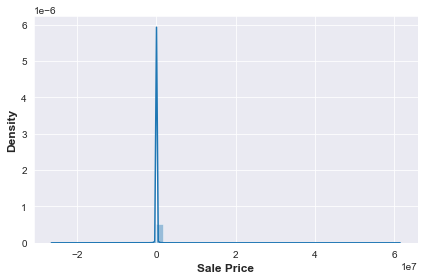

In [116]:
sns.distplot(y_test-y_pred)

In [118]:
r2_score(y_test,y_pred)

0.7229839628481425

# prediction on test data

In [140]:
test

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate,Segment
0,2023,2023-01-01,Old Lyme,12 SWAN AVE,151400.0,0,Residential,Detached House,3,947.0,1.46,0
1,2023,2023-01-01,Ridgefield,59 LINCOLN LANE,686900.0,0,Residential,Detached House,3,1051.0,1.46,0
2,2023,2023-01-04,Cromwell,6 GROVE RD,152030.0,0,Residential,Detached House,3,925.0,1.46,0
3,2023,2023-01-04,New Haven,346 CONCORD ST,156130.0,0,Residential,Duplex,4,1210.0,1.46,0
4,2023,2023-01-04,Beacon Falls,14 LASKY ROAD,108970.0,0,Residential,Detached House,3,1089.0,1.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43949,2023,2023-09-30,Ansonia,22 FINNEY ST EXT,137600.0,0,Residential,Detached House,3,1047.0,1.46,0
43950,2023,2023-09-30,Enfield,26 GARY DR,114650.0,0,Residential,Detached House,3,921.0,1.46,0
43951,2023,2023-09-30,Simsbury,72 PLANK HILL ROAD,163400.0,0,Residential,Detached House,3,957.0,1.46,0
43952,2023,2023-09-30,Essex,12 BITTERSWEET LA,282300.0,0,Residential,Detached House,3,1081.0,1.46,0


In [141]:
test.isna().sum()

Year                 0
Date                 0
Locality             0
Address              0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
Segment              0
dtype: int64

In [142]:
test.duplicated().sum()

1

In [143]:
test.drop_duplicates(keep='first',inplace=True)

In [144]:
test['Date']=pd.to_datetime(test['Date'],format="%Y-%m-%d")
test.drop(['carpet_area','Address','Date'],axis=1,inplace=True)
test=he.transform(test)
test=ohe.transform(test)
test.drop(['Sale Price','Segment'],axis=1,inplace=True)
test=pd.DataFrame(sc.transform(test),columns=test.columns)

In [145]:
prediction=model.predict(test)

In [148]:
prediction=pd.DataFrame(prediction,columns=['Sale Price'])

In [ ]:
prediction.to_csv("Submission.csv",index=False,header=True)

In [149]:
pd.concat([test,prediction],axis=1).to_csv("Submission.csv",index=False,header=True)